In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# ㅁOne Point Tutorial II - `Pandas`
<p style='text-align: right;'> Python을 활용한 데이터 사이언스 </p>
<p style='text-align: right;'> December, 2019 | All rights reserved by Wooseok Song</p>

---

# 1. Pandas를 사용하는 이유

NumPy 튜토리얼에서 언급했듯, 파이썬은 원래 데이터 분석에 특화된 언어가 아니다.<br>
Pandas는 NumPy와 함께 파이썬의 대표적인 데이터 사이언스 라이브러리로 NumPy가 기본적인 다차원 벡터화 연산을 도와준다고 하면, Pandas는 Numpy를 기반으로 하여 데이터 프레임의 활용이나 피벗테이블 생성 등이 가능하며, 데이터의 입/출력 등 여러 응용 기능을 제공한다.<br>
또한, Pandas는 리스트, 튜플 및 딕셔너리 등의 Python 기본 자료구조 외에 Series와 DataFrame이라는 고유 자료 구조를 활용한다.<br>

R에서는 유사한 기능을 사용하기 위하여 일반적으로 아래와 같은 패키지/라이브러리를 이용한다.
>* data.frame/data.table (데이터를 담는 자료 구조)
>* tidyr (wraggling; messy한 데이터셋을 tidy한 데이터셋으로 만들기)
>* dplyr (handling; 여러 인사이트를 반영하여 변수를 추가/수정/삭제 하고 요약하기)

Pandas에서도 데이터 시각화가 가능하나, R의 ggplot2와 비교하기엔 지나치게 간소한 기능만 지원한다.

### !Pandas는
 1. 모든 계산은 numpy 기반으로 수행
 2. 행은 index, 열은 변수명으로 접근할 수 있게 하여 실수를 줄이고 가독성을 제고
 3. 데이터분석에 특화된 전용 함수들을 제공
 4. 자동 혹은 사용자 지정에 따라 축을 설정하고 데이터를 정렬/연산
 5. 시계열 및 비시계열을 모두 처리 가능
 6. 누락 데이터 처리 용이
 7. RDBMS에서 수행하는 데이터 처리 기능 지원

*이후 강의 흐름

2. pd.Series에 대한 소개 및 생성/활용
3. pd.DataFrame에 대한 소개 및 생성/활용
4. Series와 DF객체를 가지고 자주 만나게 될 기본 task들
> 1. Reindex
> 2. Dropping 관측치 or 변수
> 3. 함수 적용
> 4. 연산
> 5. 정렬
> 6. Summary statistics
> 7. filter/fill NA

포인트는,<br> 
1. Pandas의 매서드들을 적용하게 될 핵심 개체인 pd.Series와 pd.DataFrame에 대해 이해하고<br>
2. 이를 활용하여 기본 task들을 어떻게 수행하게 되는지 이해하고 응용<br>

결과적으로 **R에서는 base 자료구조이고 함수인 것들이 Python에서는 존재하지 않음에서 오는 비대칭을 해소**하기 위함

# 2. pd.Series에 대한 소개 및 생성/활용

## 2.1 pd.Series란?

one dimensional data를 담는 객체(사실은 클래스)로서, 리스트의 성격과 딕셔너리의 성격이 섞여있다.<br>
차원은 한 개이나, 실제 형태는 m x 2 이다.<br>

## 2.2 pd.Series 객체의 주요 attribute

`pd.Series.shape`
> 객체의 shape은 m행 2열이다.

`Series.values`
> 객체의 데이터 부분에서 **내용물**이라고 생각하면 된다. 이 속성에는 np.array가 들어가게 된다. 

`Series.index`
> 이 객체의 데이터 부분에서 **껍데기**라고 생각하면 된다. 이 속성에는 pd.Index라는 객체가 들어간다.
> > 참고 : pd.Index말고 응용버전인 MultIndex나 pd.DatetimeIndex도 들어갈 수 있다. <br> $\qquad$pd.Index는 immutable(변경이 불가능)한데 이것은 안정성 면에서 중요하다.

## 2.3. pd.Series 객체를 생성하는 방법들

다양한 방법으로 생성할 순 있지만 거의 아래의 방식대로 생성한다,

In [2]:
import pandas as pd
import numpy as np

In [5]:
a = pd.Series([1, 2, 3, 4], index = ['a', 'b', 'c', 'd'])
a

a    1
b    2
c    3
d    4
dtype: int64

In [4]:
pd.Series(np.array([1, 2, 3, 4]), index = ['a', 'b', 'c', 'd'])

a    1
b    2
c    3
d    4
dtype: int32

In [3]:
pd.Series([1, 2, 3, 4], ['a', 'b', 'c', 'd'])

a    1
b    2
c    3
d    4
dtype: int64

## 2.4 pd.Series 객체를 indexing&slicing을 통해 접근&변경하는 법

일차원 np.array에 접근하는 방법에서 추가로 문자 index로 접근이 가능하다!

이 부분 뿐만 아니라 전체적으로 np.array의 기능 확장 버전이라고 생각하는 게 전반적으로 이해하는 데 도움이 된다.

In [4]:
a['a']

1

In [5]:
a[:]

a    1
b    2
c    3
d    4
dtype: int64

In [6]:
a[::2]

a    1
c    3
dtype: int64

In [7]:
a['a'] = 2

In [8]:
a

a    2
b    2
c    3
d    4
dtype: int64

In [9]:
a[a > 2]

c    3
d    4
dtype: int64

### boolearn indexing for Series

In [10]:
a[a > 2] = 10

In [11]:
a

a     2
b     2
c    10
d    10
dtype: int64

## 2.5 operation for pd.Series 객체

np.array와 거의 똑같은 pd.Series 객체의 연산을 지원한다.

In [12]:
sr1 = pd.Series(np.arange(1,13, dtype = np.int))
sr1

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
dtype: int32

In [13]:
sr1.sum()

78

In [14]:
sr1.mean()

6.5

In [15]:
sr1.std() # numpy와 달리 n-1로 나눠준다.

3.605551275463989

In [16]:
sr1.max()

12

## 2.6 operation for 2개의 pd.Series 객체

np.array와 정말 똑같은 pd.Series 객체들간의 연산을 지원한다.

In [6]:
sr1 = pd.Series([1, 2, 3, 4], index = ['a', 'b', 'c', 'd'])
sr2 = pd.Series([5, 6, 7, 8], index = ['a', 'b', 'c', 'd'])

In [18]:
sr1

a    1
b    2
c    3
d    4
dtype: int64

In [19]:
sr2

a    5
b    6
c    7
d    8
dtype: int64

In [20]:
sr1 + sr2

a     6
b     8
c    10
d    12
dtype: int64

In [21]:
sr1 - sr2

a   -4
b   -4
c   -4
d   -4
dtype: int64

In [7]:
sr1 / sr2

a    0.200000
b    0.333333
c    0.428571
d    0.500000
dtype: float64

In [23]:
sr1 * sr2

a     5
b    12
c    21
d    32
dtype: int64

In [24]:
sr1.dot(sr2)

70

In [25]:
pd.concat((sr1, sr2))

a    1
b    2
c    3
d    4
a    5
b    6
c    7
d    8
dtype: int64

#### 다른 점은 **shape이 다른** 객체들간의 연산도 지원한다는 것이다.

In [26]:
sr1 = pd.Series([1, 2, 3, 4], index = ['a', 'b', 'c', 'd'])
sr2 = pd.Series([5, 6, 7, 8, 9], index = ['a', 'b', 'c', 'd', 'e'])

In [27]:
sr1

a    1
b    2
c    3
d    4
dtype: int64

In [28]:
sr2

a    5
b    6
c    7
d    8
e    9
dtype: int64

In [29]:
sr1 + sr2

a     6.0
b     8.0
c    10.0
d    12.0
e     NaN
dtype: float64

**다양한 것이 가능하다. 연산은 기본적으로 인덱스 기준.**

In [70]:
sr11 = pd.Series([1, 2, 3, 4], index = ['a', 'b', 'c', 'd'])
sr12 = pd.Series([5, 6, 7, 8], index = ['d', 'c', 'b', 'a'])

In [71]:
sr11

a    1
b    2
c    3
d    4
dtype: int64

In [72]:
sr12

d    5
c    6
b    7
a    8
dtype: int64

In [73]:
sr11 + sr12

a    9
b    9
c    9
d    9
dtype: int64

## 2.7 pd.Series with NaN values

In [30]:
sr3 = sr1 + sr2

In [31]:
sr3

a     6.0
b     8.0
c    10.0
d    12.0
e     NaN
dtype: float64

In [32]:
pd.isnull(sr3)

a    False
b    False
c    False
d    False
e     True
dtype: bool

In [33]:
sr3[pd.notnull(sr3)] # 결측치 제외

a     6.0
b     8.0
c    10.0
d    12.0
dtype: float64

## 2.8 pd.Series.index.name

생각보다 자주 쓴다.

In [34]:
sr3

a     6.0
b     8.0
c    10.0
d    12.0
e     NaN
dtype: float64

In [35]:
sr3.index.name = 'name'

In [36]:
sr3 # 더 예쁘다.

name
a     6.0
b     8.0
c    10.0
d    12.0
e     NaN
dtype: float64

# 3. pd.DataFrame에 대한 짧은 소개와 생성하는 방법

## 3.1 pd.DataFrame이란?

two dimensional data를 담는 객체이다.

## 3.2 pd.DataFrame 객체의 주요 attribute

`DataFrame.shape`
> 객체의 shape은 m행, n열이다.

`DataFrame.values`
> 객체의 데이터 **내용물**이라고 생각하면 된다. 이 속성에는 2차원 np.array가 들어가게 된다. 

`DataFrame.index`
> 객체 데이터의 **행별 이름**이라고 생각하면 된다. 이 속성에는 pd.Index라는 객체가 들어간다.
> > 참고 : pd.Index는 immutable(변경이 불가능)한데 이것은 안정성 면에서 중요하다.

`DataFrame.column`
> 객체 데이터의 **열별 이름**이라고 생각하면 된다.



## 3.3. pd.DataFrame 객체를 생성하는 방법들

다양한 방법으로 생성할 순 있지만 거의 아래의 방식대로 생성한다,

### 3.3.1 Dictionary로 생성하는 방법

In [9]:
data = {'score1' : ['91', '94', '97', '100'], 'score2' : np.arange(100, 90, -3)}

In [38]:
data

{'score1': ['91', '94', '97', '100'], 'score2': array([100,  97,  94,  91])}

In [39]:
df1 = pd.DataFrame(data = data, index = ['a', 'b', 'c', 'd'])
df1

,score1,score2
a,91,100
b,94,97
c,97,94
d,100,91


In [10]:
df11 = pd.DataFrame(data, ['a', 'b', 'c', 'd'])
df11

,score1,score2
a,91,100
b,94,97
c,97,94
d,100,91


### 3.3.2 Two dimensional np.array로 생성하는 방법 (list of list도 가능)

In [40]:
data = np.arange(8).reshape(4,2)

In [41]:
data

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [42]:
df1 = pd.DataFrame(data = data, index = ['a', 'b', 'c', 'd'])
df1

,0,1
a,0,1
b,2,3
c,4,5
d,6,7


## 3.4 pd.DataFrame 객체를 indexing&slicing을 통해 접근&변경하는 법

`iloc` : **2차원 np.array처럼** ~행 ~열에 접근할 때 사용한다,

`loc` : index명을 이용하여 접근할 때 사용한다.

`ix`는 이제 안쓴다,

In [12]:
data = np.array([[1, 2, 3, 4],
          [5, 6, 7, 8],
          [9, 10, 11, 12]],dtype=np.int)
data

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [14]:
df1 = pd.DataFrame(data, index=['a', 'b', 'c'], columns=['score1', 'score2', 'score3', 'score4'])
df1

,score1,score2,score3,score4
a,1,2,3,4
b,5,6,7,8
c,9,10,11,12


In [17]:
df1.iloc[1,2] # 2행 3열에 접근하는 방법1

3

In [45]:
df1.iloc[1][2] # 2행 3열에 접근하는 방법2

7

In [46]:
df1.loc['b', 'score3'] # b행의 score3값(2행 3열)에 접근하는 방법1

7

In [47]:
df1.loc['b']['score3'] # b행의 score3값(2행 3열)에 접근하는 방법2

7

In [18]:
df1.score3[1] # score3열의 두 번째 행 값에 접근하는 방법

7

In [19]:
df1.loc['b']['score3'] = 100 # b행의 score3값(2행 3열)에 접근하여 변경

In [20]:
df1

,score1,score2,score3,score4
a,1,2,3,4
b,5,6,100,8
c,9,10,11,12


numpy에서 배웠던 slicing을 `iloc`안에서 사용하면 `np.array[...]` 빼고 다 된다.

### fancy indexing for DataFrame

In [21]:
df1.iloc[[1, 2, 1],[0, 2, 3]] # (1,0), (2, 2), (1, 3) 선택

,score1,score3,score4
b,5,100,8
c,9,11,12
b,5,100,8


## 3.5 operation for pd.DataFrame 객체

np.array와 거의 똑같은 pd.Series 객체의 연산을 지원한다.


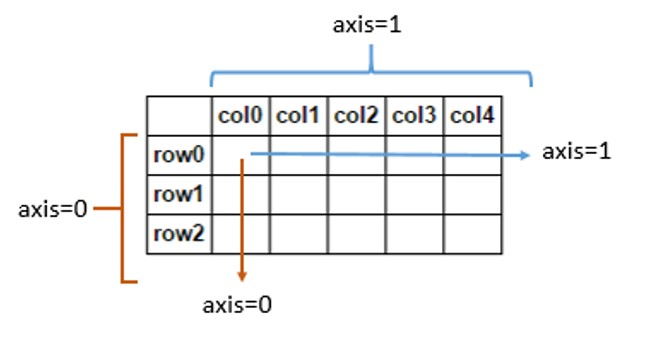

( [출처](https://stackoverflow.com/questions/17079279/how-is-axis-indexed-in-numpys-array) )

In [22]:
mat1 = np.array([[1, 2, 3, 4],
          [5, 6, 7, 8],
          [9, 10, 11, 12]], dtype=np.int)
df1 = pd.DataFrame(mat1)
df1

,0,1,2,3
0,1,2,3,4
1,5,6,7,8
2,9,10,11,12


In [53]:
df1.sum(axis = 0) # 반환 값의 타입은 pd.Series이다.

0    15
1    18
2    21
3    24
dtype: int64

In [54]:
df1.sum(axis=1) # 반환 값의 타입은 pd.Series이다.

0    10
1    26
2    42
dtype: int64

## 3.6 operation for 2개의 pd.DataFrame 객체

np.array와 정말 똑같은 pd.Series 객체들간의 연산을 지원한다.

In [23]:
mat1 = np.array([[1, 2, 3, 4],
          [5, 6, 7, 8],
          [9, 10, 11, 12]], dtype = np.int) # 3 X 4

mat2 = np.arange(13, 25, dtype = np.int).reshape(3,4) # 3 X 4

df1 = pd.DataFrame(mat1)
df2 = pd.DataFrame(mat2)

In [56]:
df1

,0,1,2,3
0,1,2,3,4
1,5,6,7,8
2,9,10,11,12


In [57]:
df2

,0,1,2,3
0,13,14,15,16
1,17,18,19,20
2,21,22,23,24


In [58]:
df1 + df2

,0,1,2,3
0,14,16,18,20
1,22,24,26,28
2,30,32,34,36


In [59]:
df1 - df2

,0,1,2,3
0,-12,-12,-12,-12
1,-12,-12,-12,-12
2,-12,-12,-12,-12


In [60]:
df1 * df2

,0,1,2,3
0,13,28,45,64
1,85,108,133,160
2,189,220,253,288


In [61]:
df2.T

,0,1,2
0,13,17,21
1,14,18,22
2,15,19,23
3,16,20,24


In [62]:
df1.dot(df2.T)

,0,1,2
0,150,190,230
1,382,486,590
2,614,782,950


In [63]:
pd.concat((df1, df2), axis=0) # index의 중복이 있다

,0,1,2,3
0,1,2,3,4
1,5,6,7,8
2,9,10,11,12
0,13,14,15,16
1,17,18,19,20
2,21,22,23,24


In [64]:
pd.concat((df1, df2), axis=1) # index의 중복이 있다

,0,1,2,3,0,1,2,3
0,1,2,3,4,13,14,15,16
1,5,6,7,8,17,18,19,20
2,9,10,11,12,21,22,23,24


In [65]:
pd.concat((df1, df2), axis=1).loc[:,1] # index 중복의 결과로서 2개의 열이 나온다.

,1,1
0,2,14
1,6,18
2,10,22


#### 다른 점은 **shape이 다른** 객체들간의 연산도 지원한다는 것이다.

In [30]:
mat1 = np.array([[1, 2, 3, 4, 5],
          [6, 7, 8, 9, 10],
          [11, 12, 13, 14, 15]],dtype=np.int)
df1 = pd.DataFrame(mat1, index=['a', 'b', 'c'], columns=['score1', 'score2', 'score3', 'score4', 'score5'])

In [31]:
mat2 = np.array([[3, 4, 5, 6],
          [7, 8, 9, 10],
          [11, 12, 13, 14]],dtype=np.int)
df2 = pd.DataFrame(mat2, index=['a', 'b', 'c'], columns=['score3', 'score4', 'score5', 'score6'])

In [32]:
df1

,score1,score2,score3,score4,score5
a,1,2,3,4,5
b,6,7,8,9,10
c,11,12,13,14,15


In [33]:
df2

,score3,score4,score5,score6
a,3,4,5,6
b,7,8,9,10
c,11,12,13,14


In [34]:
df1 + df2

,score1,score2,score3,score4,score5,score6
a,NaN,NaN,6,8,10,NaN
b,NaN,NaN,15,17,19,NaN
c,NaN,NaN,24,26,28,NaN


## 3.7 pd.DataFrame with NaN values

In [35]:
df3 = df1 + df2

In [36]:
df3

,score1,score2,score3,score4,score5,score6
a,NaN,NaN,6,8,10,NaN
b,NaN,NaN,15,17,19,NaN
c,NaN,NaN,24,26,28,NaN


In [37]:
df3.isnull()

,score1,score2,score3,score4,score5,score6
a,True,True,False,False,False,True
b,True,True,False,False,False,True
c,True,True,False,False,False,True


In [38]:
df3.where(df3.notnull())

,score1,score2,score3,score4,score5,score6
a,NaN,NaN,6,8,10,NaN
b,NaN,NaN,15,17,19,NaN
c,NaN,NaN,24,26,28,NaN


In [40]:
df3.where(df3.notnull()).dropna(axis = 0)

,score1,score2,score3,score4,score5,score6


In [41]:
df3.where(df3.notnull()).dropna(axis = 1)

,score3,score4,score5
a,6,8,10
b,15,17,19
c,24,26,28


## 3.8 pd.DataFrame.index(or columms).name

생각보다 자주 쓴다.

In [76]:
df3

,score1,score2,score3,score4,score5,score6
a,NaN,NaN,4,6,NaN,NaN
b,NaN,NaN,12,14,NaN,NaN
c,NaN,NaN,20,22,NaN,NaN


In [77]:
df3.index.name = 'name'

In [78]:
df3.columns.name = 'exam'

In [79]:
df3

exam,score1,score2,score3,score4,score5,score6
name,,,,,,
a,NaN,NaN,4,6,NaN,NaN
b,NaN,NaN,12,14,NaN,NaN
c,NaN,NaN,20,22,NaN,NaN


# 4. Series와 DF객체를 가지고 자주 만나게 될 기본 task들
> 1. Reindex
> 2. Dropping 관측치 or 변수
> 3. 함수 적용
> 4. 정렬
> 5. Summary statistics
> 6. filter/fill NA

## 4.1 Reindex

아까 pd.Index는 immutable하여서 안정적이고 쉽게 변경하지 못하게 만들어놨는데

순서정도를 바꿀 일은 흔하다.

In [42]:
sr1 = pd.Series([91, 100, 93, 94], index = list('abcd'))

In [43]:
sr1

a     91
b    100
c     93
d     94
dtype: int64

In [82]:
sr1.reindex(['kim','a', 'b', 'c', 'd'])

kim      NaN
a       91.0
b      100.0
c       93.0
d       94.0
dtype: float64

In [83]:
sr1.reindex(['kim','a', 'b', 'c', 'd'], fill_value = 0)

kim      0
a       91
b      100
c       93
d       94
dtype: int64

In [45]:
sr1.reindex(['kim','d', 'c', 'b', 'a'], fill_value = 0)

kim      0
d       94
c       93
b      100
a       91
dtype: int64

In [44]:
mat1 = np.array([[1, 2, 3, 4],
          [5, 6, 7, 8],
          [9, 10, 11, 12]],dtype = np.int)
df1 = pd.DataFrame(mat1, index = ['a', 'b', 'c'], columns = ['score1', 'score2', 'score3', 'score4'])

In [85]:
df1

,score1,score2,score3,score4
a,1,2,3,4
b,5,6,7,8
c,9,10,11,12


In [86]:
df1.reindex(index = ['c', 'a'], columns = ['score1', 'score5', 'score4'])

,score1,score5,score4
c,9.0,NaN,12.0
a,1.0,NaN,4.0


## 4.2 Dropping 관측치 or 변수

In [50]:
sr1 = pd.Series([91, 100, 93, 94], index = ['a', 'd', 'c', 'b'])

mat1 = np.array([[1, 2, 3, 4],
          [5, 6, 7, 8],
          [9, 10, 11, 12]],dtype = np.int)
df1 = pd.DataFrame(mat1, index = ['a', 'b', 'c'], columns = ['score1', 'score2', 'score3', 'score4'])

In [88]:
sr1

a     91
d    100
c     93
b     94
dtype: int64

In [89]:
sr1.drop('c')

a     91
d    100
b     94
dtype: int64

In [48]:
df1

,score1,score2,score3,score4
a,1,2,3,4
b,5,6,7,8
c,9,10,11,12


In [91]:
df1.drop('b')

,score1,score2,score3,score4
a,1,2,3,4
c,9,10,11,12


In [54]:
df1.drop(['score1', 'score3'], axis = 1)

,score2,score4
a,2,4
b,6,8
c,10,12


## 4.3 함수 적용

In [58]:
df1 = pd.DataFrame(np.random.randn(9).reshape(3,3), index=['stu1', 'stu2', 'stu3'], columns=['exam1', 'exam2', 'exam3'])

In [61]:
df1

,exam1,exam2,exam3
stu1,1.227322,2.023810,-0.155163
stu2,-0.040676,-0.809812,1.191605
stu3,-0.959100,1.044292,-1.282844


#### DataFrame에서 한 observation에 대한 함수 적용도 흔하고 한 variable에 대한 함수 적용도 흔하다.

In [55]:
f_length = lambda x: x.max() - x.min() 

**lambda**는 functional programming 문법이다. 개념 자체가 정말 어려우니 느낌만 받고 써도 무방하다.

functional : 인수에 함수 넣어서 값을 뱉는 함수

In [59]:
# exam별 최고점자와 최저점자의 점수 차이
df1.apply(f_length)

exam1    2.186422
exam2    2.833622
exam3    2.474449
dtype: float64

In [60]:
# 학생별 최고점과 최저점의 점수 차이
df1.apply(f_length, axis=1)

stu1    2.178973
stu2    2.001417
stu3    2.327136
dtype: float64

In [98]:
df1.apply(np.mean)

exam1    0.151600
exam2    0.217613
exam3   -0.670145
dtype: float64

In [99]:
df1.apply(max)

exam1    0.770693
exam2    1.419091
exam3   -0.210392
dtype: float64

#### DataFrame에서 각 element에 대한 함수 적용도 한다.

In [62]:
f_double = lambda x: 2 * x

In [68]:
df1.applymap(f_double)

,exam1,exam2,exam3
stu1,2.454645,4.047620,-0.310326
stu2,-0.081352,-1.619624,2.383210
stu3,-1.918200,2.088584,-2.565688


In [66]:
f_format = lambda x: '{0:.2f}'.format(x)

In [67]:
df1.applymap(f_format)

,exam1,exam2,exam3
stu1,1.23,2.02,-0.16
stu2,-0.04,-0.81,1.19
stu3,-0.96,1.04,-1.28


## 4.4 Sorting and ranking

In [104]:
sr1 = pd.Series([91, 100, 93, 94], index=['b', 'd', 'c', 'a'])

In [105]:
sr1

b     91
d    100
c     93
a     94
dtype: int64

In [106]:
sr1.sort_index()

a     94
b     91
c     93
d    100
dtype: int64

In [107]:
sr1.sort_values()

b     91
c     93
a     94
d    100
dtype: int64

In [108]:
sr1.rank()

b    1.0
d    4.0
c    2.0
a    3.0
dtype: float64

In [109]:
sr1.rank(ascending = False)

b    4.0
d    1.0
c    3.0
a    2.0
dtype: float64

In [110]:
df1 = pd.DataFrame(np.random.randn(9).reshape(3,3), index=['stu1', 'stu2', 'stu3'], columns=['exam3', 'exam2', 'exam1'])

In [111]:
df1

,exam3,exam2,exam1
stu1,-0.606779,1.686663,-1.124914
stu2,-2.932180,1.178830,0.464685
stu3,-0.095292,2.572066,1.835078


In [112]:
df1.sort_index(axis = 1)

,exam1,exam2,exam3
stu1,-1.124914,1.686663,-0.606779
stu2,0.464685,1.178830,-2.932180
stu3,1.835078,2.572066,-0.095292


In [113]:
df1.sort_index(axis=1, ascending=False)

,exam3,exam2,exam1
stu1,-0.606779,1.686663,-1.124914
stu2,-2.932180,1.178830,0.464685
stu3,-0.095292,2.572066,1.835078


In [114]:
df1.sort_values(by='exam3')

,exam3,exam2,exam1
stu2,-2.932180,1.178830,0.464685
stu1,-0.606779,1.686663,-1.124914
stu3,-0.095292,2.572066,1.835078


In [115]:
df1.sort_values(by=['exam3', 'exam1']) # exam3 순으로 먼저 sort하고 그 다음 exam1 순으로 sort

,exam3,exam2,exam1
stu2,-2.932180,1.178830,0.464685
stu1,-0.606779,1.686663,-1.124914
stu3,-0.095292,2.572066,1.835078


In [116]:
df1.rank()

,exam3,exam2,exam1
stu1,2.0,2.0,1.0
stu2,1.0,1.0,2.0
stu3,3.0,3.0,3.0


In [117]:
df1.rank(axis=1)

,exam3,exam2,exam1
stu1,2.0,3.0,1.0
stu2,1.0,3.0,2.0
stu3,1.0,3.0,2.0


## 4.5 Summary statistics

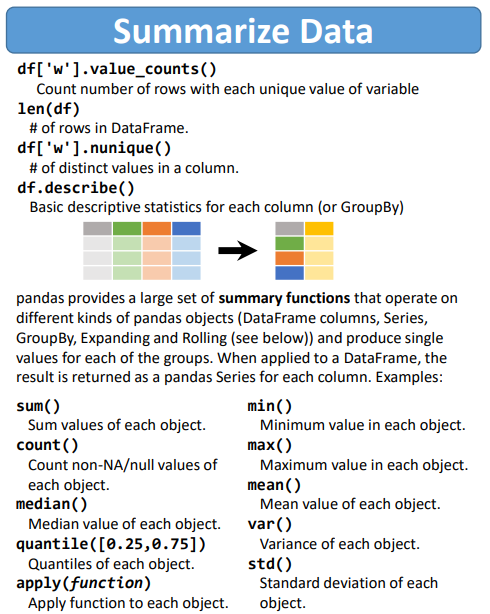

( [출처](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) )

In [118]:
df1 = pd.DataFrame({'major' : ['stat', 'stat', 'CS', 'CS', 'math'], 'score1': np.arange(100,90,-2), 'score2': np.arange(90,100,2)},\
                  index=['lee', 'kim', 'park', 'cho', 'song'])

In [119]:
df1

,major,score1,score2
lee,stat,100,90
kim,stat,98,92
park,CS,96,94
cho,CS,94,96
song,math,92,98


In [120]:
df1.iloc[:, 1:3]

,score1,score2
lee,100,90
kim,98,92
park,96,94
cho,94,96
song,92,98


In [121]:
df1.iloc[:, 1:3].mean(axis = 0)

score1    96.0
score2    94.0
dtype: float64

In [122]:
df1.iloc[:, 1:3].idxmax()

score1     lee
score2    song
dtype: object

In [123]:
df1.describe()

,score1,score2
count,5.000000,5.000000
mean,96.000000,94.000000
std,3.162278,3.162278
min,92.000000,90.000000
25%,94.000000,92.000000
50%,96.000000,94.000000
75%,98.000000,96.000000
max,100.000000,98.000000


In [124]:
df1.major.value_counts()

stat    2
CS      2
math    1
Name: major, dtype: int64

In [125]:
df1.corr()

,score1,score2
score1,1.0,-1.0
score2,-1.0,1.0


## 4.6 filter/fill NA

### 4.6.1 filter NA

In [126]:
sr1 = pd.Series([np.nan, 2., np.nan, 4.])

In [127]:
sr1

0    NaN
1    2.0
2    NaN
3    4.0
dtype: float64

In [128]:
sr1.dropna()

1    2.0
3    4.0
dtype: float64

In [129]:
sr1[sr1.notnull()]

1    2.0
3    4.0
dtype: float64

In [130]:
df1 = pd.DataFrame([[1, 2, 3, 4],\
                    [np.nan, 2., np.nan, 4.],\
                    [np.nan, 3, 4, 5]])

In [131]:
df1.columns = ['exam1', 'exam2', 'exam3', 'exam4']

In [132]:
df1.index = ['stu1', 'stu2', 'stu3']

In [133]:
df1

,exam1,exam2,exam3,exam4
stu1,1.0,2.0,3.0,4.0
stu2,NaN,2.0,NaN,4.0
stu3,NaN,3.0,4.0,5.0


In [134]:
df1.dropna()

,exam1,exam2,exam3,exam4
stu1,1.0,2.0,3.0,4.0


In [135]:
df1.dropna(axis=1)

,exam2,exam4
stu1,2.0,4.0
stu2,2.0,4.0
stu3,3.0,5.0


In [136]:
df2 = pd.DataFrame([np.nan, np.nan, np.nan, np.nan]).T
df2.columns = ['exam1', 'exam2', 'exam3', 'exam4']
df2.index =  ['stu4']

In [137]:
df3 = pd.concat((df1, df2), axis=0)
df3

,exam1,exam2,exam3,exam4
stu1,1.0,2.0,3.0,4.0
stu2,NaN,2.0,NaN,4.0
stu3,NaN,3.0,4.0,5.0
stu4,NaN,NaN,NaN,NaN


In [138]:
df3.dropna(how='all')

,exam1,exam2,exam3,exam4
stu1,1.0,2.0,3.0,4.0
stu2,NaN,2.0,NaN,4.0
stu3,NaN,3.0,4.0,5.0


In [139]:
df3.dropna(how='any')

,exam1,exam2,exam3,exam4
stu1,1.0,2.0,3.0,4.0


### 4.6.2 fill NA

In [140]:
df3

,exam1,exam2,exam3,exam4
stu1,1.0,2.0,3.0,4.0
stu2,NaN,2.0,NaN,4.0
stu3,NaN,3.0,4.0,5.0
stu4,NaN,NaN,NaN,NaN


In [141]:
df3.fillna(0) # 0점으로 결측치를 채우자!

,exam1,exam2,exam3,exam4
stu1,1.0,2.0,3.0,4.0
stu2,0.0,2.0,0.0,4.0
stu3,0.0,3.0,4.0,5.0
stu4,0.0,0.0,0.0,0.0


In [142]:
df3.fillna({'exam1': df3.exam1.mean(), 'exam2': df3.exam2.mean(),\
            'exam3': df3.exam3.mean(), 'exam4': df3.exam4.mean()}) # 평균으로 결측치를 채우자!

,exam1,exam2,exam3,exam4
stu1,1.0,2.000000,3.0,4.000000
stu2,1.0,2.000000,3.5,4.000000
stu3,1.0,3.000000,4.0,5.000000
stu4,1.0,2.333333,3.5,4.333333
